In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
data = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.to_csv('tesla-stocks.csv')

In [ ]:
tsla_stocks = pd.read_csv('tesla-stocks.csv')

In [ ]:
tsla_stocks.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3577,2024-09-16,229.300003,229.960007,223.529999,226.779999,226.779999,54323000
3578,2024-09-17,229.449997,234.570007,226.550003,227.869995,227.869995,66761600
3579,2024-09-18,230.089996,235.679993,226.880005,227.199997,227.199997,78010200
3580,2024-09-19,234.000000,244.240005,232.130005,243.919998,243.919998,102694600
3581,2024-09-20,241.520004,243.990005,235.919998,238.250000,238.250000,98965572


In [ ]:
tsla_stocks = tsla_stocks.set_index('Date') #indexing by date
tsla_stocks.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,229.300003,229.960007,223.529999,226.779999,226.779999,54323000
2024-09-17,229.449997,234.570007,226.550003,227.869995,227.869995,66761600
2024-09-18,230.089996,235.679993,226.880005,227.199997,227.199997,78010200
2024-09-19,234.000000,244.240005,232.130005,243.919998,243.919998,102694600
2024-09-20,241.520004,243.990005,235.919998,238.250000,238.250000,98965572


In [ ]:
tsla_stocks = tsla_stocks.drop(columns=["Adj Close","Volume"],axis=1) #removing columns we do not need

In [ ]:
#We only need 2024 datas
tsla_stocks = tsla_stocks.loc['2022-01-02':'2024-09-13']

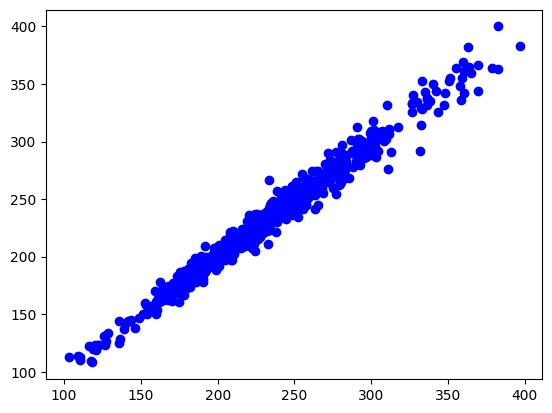

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(tsla_stocks.loc[:,'Open'],tsla_stocks.loc[:,'Close'],color="blue") #we try to see if they are linearly correlated

In [ ]:
import numpy as np

tsla_stocks.corr()['Open'].sort_values(ascending=True) #to have a look at the correlation between variables

,Open
Close,0.990036
Low,0.995697
High,0.996701
Open,1.000000


In [ ]:
tsla_stocks.isnull().sum() #checking if there are missing values

,0
Open,0
High,0
Low,0
Close,0


In [ ]:
tsla_stocks['Daily Return'] = tsla_stocks['Close'].pct_change()
tsla_stocks['Daily Return'].fillna(0, inplace=True) #first day, there is no daily return
tsla_stocks.head(5)

,Open,High,Low,Close,Daily Return
Date,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,0.000000
2022-01-04,396.516663,402.666656,374.350006,383.196655,-0.041833
2022-01-05,382.216675,390.113342,360.336670,362.706665,-0.053471
2022-01-06,359.000000,362.666656,340.166656,354.899994,-0.021523
2022-01-07,360.123322,360.309998,336.666656,342.320007,-0.035447


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #data in range of 0 and 1, without changing the data shape compared to standard scaler (important in analyzing stocks)
df_scaled = scaler.fit_transform(tsla_stocks[['Open', 'High', 'Low', 'Close']])
df_scaled = pd.DataFrame(df_scaled, columns=['Open', 'High', 'Low', 'Close'])
df_scaled.head(5)

,Open,High,Low,Close
0,0.952530,0.992060,1.000000,1.000000
1,1.000000,1.000000,0.984361,0.942671
2,0.951280,0.956849,0.933748,0.872459
3,0.872182,0.862504,0.860897,0.845707
4,0.876009,0.854403,0.848256,0.802600


In [ ]:
lookback = 30

#creating our training data
train_size = int(len(df_scaled)*0.8)
train_data = df_scaled[:train_size]
print(train_data)

#creating our validation data
valid_size = int(len(df_scaled)*0.1)
valid_data = df_scaled[train_size-lookback:train_size + valid_size]
print(valid_data)

#creating our test data
test_size = len(df_scaled) - train_size - valid_size
test_data = df_scaled[train_size + valid_size - lookback:]
print(test_data)

         Open      High       Low     Close
0    0.952530  0.992060  1.000000  1.000000
1    1.000000  1.000000  0.984361  0.942671
2    0.951280  0.956849  0.933748  0.872459
3    0.872182  0.862504  0.860897  0.845707
4    0.876009  0.854403  0.848256  0.802600
..        ...       ...       ...       ...
537  0.314497  0.294999  0.323943  0.287397
538  0.304208  0.309470  0.325749  0.312857
539  0.344239  0.322601  0.348358  0.313988
540  0.331906  0.321570  0.349009  0.321903
541  0.344716  0.321501  0.349045  0.321355

[542 rows x 4 columns]
         Open      High       Low     Close
512  0.387985  0.363334  0.386210  0.355622
513  0.364511  0.348691  0.381948  0.356684
514  0.372245  0.364537  0.377289  0.345068
515  0.368974  0.357147  0.382634  0.346233
516  0.370950  0.347110  0.379095  0.341744
..        ...       ...       ...       ...
604  0.257498  0.243781  0.265720  0.242233
605  0.257226  0.235703  0.260086  0.239800
606  0.255965  0.243678  0.262506  0.233666
607  0.2

In [ ]:
X_train = []
Y_train = []
for i in range(lookback,len(train_data)):
  X_train.append(train_data.iloc[i-lookback:i,:])
  Y_train.append(train_data.iloc[i,3])

X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train)
print(f"X_train shape: {X_train.shape}") # Expect (samples, lookback, number of features)

X_valid = []
Y_valid = []
for i in range(lookback,len(valid_data)):
  X_valid.append(train_data.iloc[i-lookback:i,:])
  Y_valid.append(train_data.iloc[i,3])

X_valid, Y_valid = np.array(X_valid), np.array(Y_valid)
print(X_valid)
print(f"X_valid shape: {X_valid.shape}") # Expect (samples, lookback, number of features)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], X_valid.shape[2]))

[[[0.95252972 0.99205959 1.         1.        ]
  [1.         1.         0.98436094 0.94267141]
  [0.95128049 0.9568491  0.93374752 0.87245853]
  ...
  [0.68067689 0.6972902  0.71185033 0.66277926]
  [0.68210775 0.6653796  0.65646941 0.61189287]
  [0.62752827 0.64580929 0.65941899 0.62989451]]

 [[1.         1.         0.98436094 0.94267141]
  [0.95128049 0.9568491  0.93374752 0.87245853]
  [0.87218217 0.86250358 0.8608974  0.84570748]
  ...
  [0.68210775 0.6653796  0.65646941 0.61189287]
  [0.62752827 0.64580929 0.65941899 0.62989451]
  [0.67117144 0.67344599 0.70785329 0.68320232]]

 [[0.95128049 0.9568491  0.93374752 0.87245853]
  [0.87218217 0.86250358 0.8608974  0.84570748]
  [0.87600928 0.85440277 0.84825609 0.80259974]
  ...
  [0.62752827 0.64580929 0.65941899 0.62989451]
  [0.67117144 0.67344599 0.70785329 0.68320232]
  [0.68712732 0.67737613 0.71728005 0.68429888]]

 ...

 [[0.39888707 0.39045546 0.4165854  0.37964317]
  [0.38192042 0.38409628 0.39863473 0.38313841]
  [0.38110

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D
from keras import optimizers

#CNN-LSTM neural network model

model = Sequential()

# CNN part: Convolution + Pooling layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))  # Pooling layer to downsample

# LSTM part
model.add(LSTM(units=256, return_sequences=True))  # LSTM layer to process time dependencies
model.add(Dropout(0.2))  # Regularization

model.add(LSTM(units=128, return_sequences=False))  # Second LSTM layer for further learning
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train,Y_train,epochs=50,validation_data=(X_valid,Y_valid))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - loss: 0.0633 - val_loss: 0.0177
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.0127 - val_loss: 0.0179
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - loss: 0.0095 - val_loss: 0.0143
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - loss: 0.0069 - val_loss: 0.0162
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 0.0064 - val_loss: 0.0098
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0057 - val_loss: 0.0080
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0050 - val_loss: 0.0068
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0042 - val_loss: 0.0083
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0046 - val_loss: 0.0104
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0038 - val_loss: 0.0054
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0034 - val_loss: 0.0049
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - lo

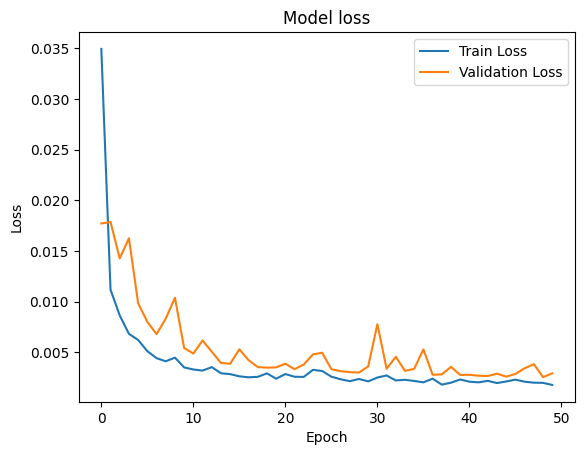

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

[0.23932016 0.23774386 0.22509936 0.21437385 0.23709278 0.25484307
 0.23956    0.27187373 0.26303286 0.25175906 0.25669346 0.25522
 0.27156534 0.30247406 0.3060721  0.3076484  0.34870015 0.42203133
 0.47387719 0.49145613 0.49632203 0.52849861 0.53168551 0.45551012
 0.48018229 0.49529401 0.50872664 0.48110751 0.48360898 0.44923927
 0.49142183 0.47384294 0.36970578 0.38430347 0.38276147 0.42490979
 0.39242471 0.42480699 0.37268699 0.34119568 0.31107509 0.31710605
 0.28667701 0.31093799 0.31491297 0.30631199 0.34174397 0.31964182
 0.36336638 0.37015122 0.3927674  0.38721618 0.39465209 0.35144151
 0.38454337 0.36017959 0.34647282 0.33461644 0.33643259 0.36326359
 0.35123592 0.38142506 0.41829625 0.35168135 0.37066525 0.40458948
 0.41130582 0.41706264 0.41870743]
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step


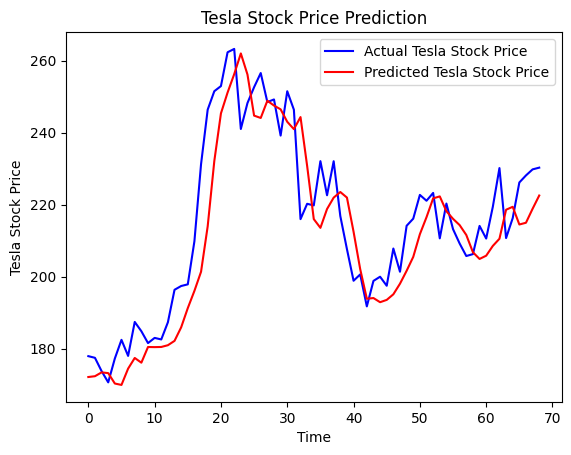

In [ ]:
X_test, Y_test = [], df_scaled['Close'][train_size + valid_size:].values
print(Y_test)

for i in range(lookback,len(test_data)):
  X_test.append(test_data.iloc[i-lookback:i,:])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

predicted_stock_price = model.predict(X_test)
predicted_stock_price_extended = np.concatenate(
    [np.zeros((predicted_stock_price.shape[0], 3)),  # Zeros for Open, High, Low
     predicted_stock_price],  # Predicted 'Close' prices
    axis=1
)
predicted_stock_price_original_scale = scaler.inverse_transform(predicted_stock_price_extended)[:, 3]

Y_test_scaled = np.reshape(Y_test, (-1, 1))  # Ensure it's in the correct shape
Y_test_extended = np.concatenate(
    [np.zeros((Y_test_scaled.shape[0], 3)),  # Zeros for Open, High, Low
     Y_test_scaled],  # Actual Close prices (scaled)
    axis=1
)
Y_test_original_scale = scaler.inverse_transform(Y_test_extended)[:, 3]


plt.plot(Y_test_original_scale, color='blue', label='Actual Tesla Stock Price')
plt.plot(predicted_stock_price_original_scale, color='red', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(Y_test_original_scale, predicted_stock_price_original_scale)
mse = mean_squared_error(Y_test_original_scale, predicted_stock_price_original_scale)
mae = mean_absolute_error(Y_test_original_scale, predicted_stock_price_original_scale)
rmse = np.sqrt(mse)

print(f"R-squared on test set: {r2}")
print(f"Mean Squared Error (MSE) on test set: {mse}")
print(f"Mean Absolute Error (MAE) on test set: {mae}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse}")

R-squared on validation set: 0.7894969910860481
Mean Squared Error (MSE) on validation set: 121.56631325790609
Mean Absolute Error (MAE) on validation set: 8.781427816388897
Root Mean Squared Error (RMSE) on validation set: 11.025711462663354
